User : FairuzFH \n
Github : https://github.com/FairuzFernanda30/Python-Coding.git \n
Link Dataset : https://www.kaggle.com/datasets/victorahaji/worlds-air-quality-and-water-pollution-dataset 

In [191]:
%maplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

pd.set_option("display.max_columns", None)

UsageError: Line magic function `%maplotlib` not found.


memasukkan library yang dibutuhkan seperi numpy pandas, matplotlib dan seaborn. numpy digunakan untuk melakukan operasi peritunganm, pandas digunakan untuk membaca dan mengolah dataset, sedangkan matplotlib digunakan untuk menampilkan grafik dan seaborn digunakan untuk menampilkan heatmap

Tujuan :

1. Mencari 20 Kota Dengan Memiliki polusi terburuk di dunia
2. kota jakarta berada di peringkat berapa polusinya jika dibandingkan negara asean lain

In [192]:
dataset = pd.read_csv(r"C:\Users\Kichiro\Downloads\cities_air_quality_water_pollution.18-10-2021 (1).csv")

kode diatas digunakan untuk membaca dataset menggunakan library pandas dengan perintah pd.read_csv(Alamat File yang ingin dibaca) 

In [193]:
dataset.head(10)

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
5,Bern,"""Canton of Bern""","""Switzerland""",94.318182,12.500000
6,Geneva,"""Canton of Geneva""","""Switzerland""",71.538462,17.372881
7,Zurich,"""Canton of Zurich""","""Switzerland""",83.809524,10.714286
8,Basel,"""""","""Switzerland""",81.666667,26.923077
9,London,"""England""","""United Kingdom""",37.042254,40.716374


In [194]:
list(dataset.columns)

['City', ' "Region"', ' "Country"', ' "AirQuality"', ' "WaterPollution"']

In [195]:
# mengecek informasi yang tersedia pada dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               3963 non-null   object 
 1    "Region"          3963 non-null   object 
 2    "Country"         3963 non-null   object 
 3    "AirQuality"      3963 non-null   float64
 4    "WaterPollution"  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [196]:
#menghitung dimensi dataset yang tersedia
dataset.shape

(3963, 5)

In [197]:
#menampilkan deskripsi dataset
dataset.describe()

,"""AirQuality""","""WaterPollution"""
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


In [198]:
#menghilangkan double quotes ("") pada dataframe
dataset = dataset.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

#menamakan kembali kolom
dataset = dataset.rename(columns=lambda x: x.replace('"', ''))

C:\Users\Kichiro\AppData\Local\Temp\ipykernel_164152\2477913932.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)


In [199]:
#mengecek apakah ada missing value
dataset.isnull().sum()

City               0
 Region            0
 Country           0
 AirQuality        0
 WaterPollution    0
dtype: int64

berdasarkan hasil eksekusi diatas menujukkan bahwa tidak ada lagi missing value di dataset tersebut

In [200]:
#mengecek apakah ada value yang duplikasi
df.duplicated().any()

False

berdasarkan pernyataan diatas dapat dijelaskan tidak ada value yang diduplikat (ganda)

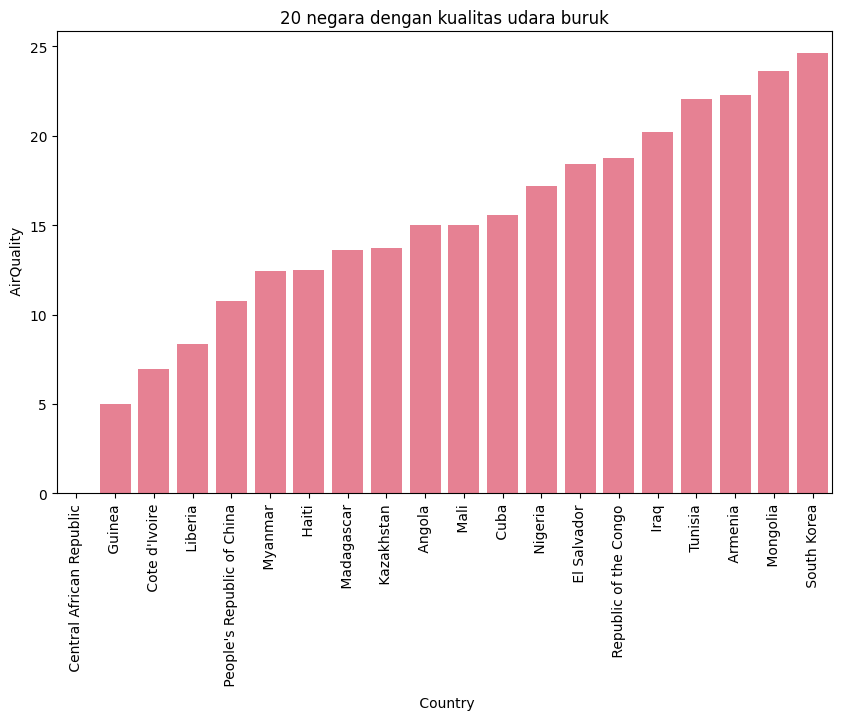

In [201]:
#memberi warna pada grafik
sns.set_palette("husl")  

# mendefinisikan ukuran grafik
plt.figure(figsize=(10, 6))

# membuat grafik dengan X adalah Country dan Y adalah AirQuality
sns.barplot(x=bottom_20_air.index, y=bottom_20_air)
plt.xticks(rotation=90)
plt.title("20 negara dengan kualitas udara buruk")
plt.show()

berdasarkan penyajian grafik diatas dapat dijelaskan bahwa CAR (Central African Republic) dan Guinea memiliki kualitas udara terburuk di dunia

In [202]:
# Data untuk grafik "Top 20 countries with dirty air"
bottom_20_air = df.groupby(' Country')[' AirQuality'].mean().sort_values(ascending=True).head(20)

# Membuat DataFrame untuk data tersebut
df_bottom_20_air = pd.DataFrame({'Country': bottom_20_air.index, 'AirQuality': bottom_20_air.values})

print(df_bottom_20_air)

                        Country  AirQuality
0      Central African Republic    0.000000
1                        Guinea    5.000000
2                 Cote d'Ivoire    6.944444
3                       Liberia    8.333333
4    People's Republic of China   10.761067
5                       Myanmar   12.462207
6                         Haiti   12.500000
7                    Madagascar   13.636364
8                    Kazakhstan   13.737825
9                        Angola   15.000000
10                         Mali   15.000000
11                         Cuba   15.555556
12                      Nigeria   17.162162
13                  El Salvador   18.421053
14        Republic of the Congo   18.750000
15                         Iraq   20.189394
16                      Tunisia   22.037037
17                      Armenia   22.270115
18                     Mongolia   23.590686
19                  South Korea   24.597575


Kode diatas menjelaskan mengenai nilai airquality dari 20 besar negara dengan udara terkotor di dunia dalam bentuk dataframe.

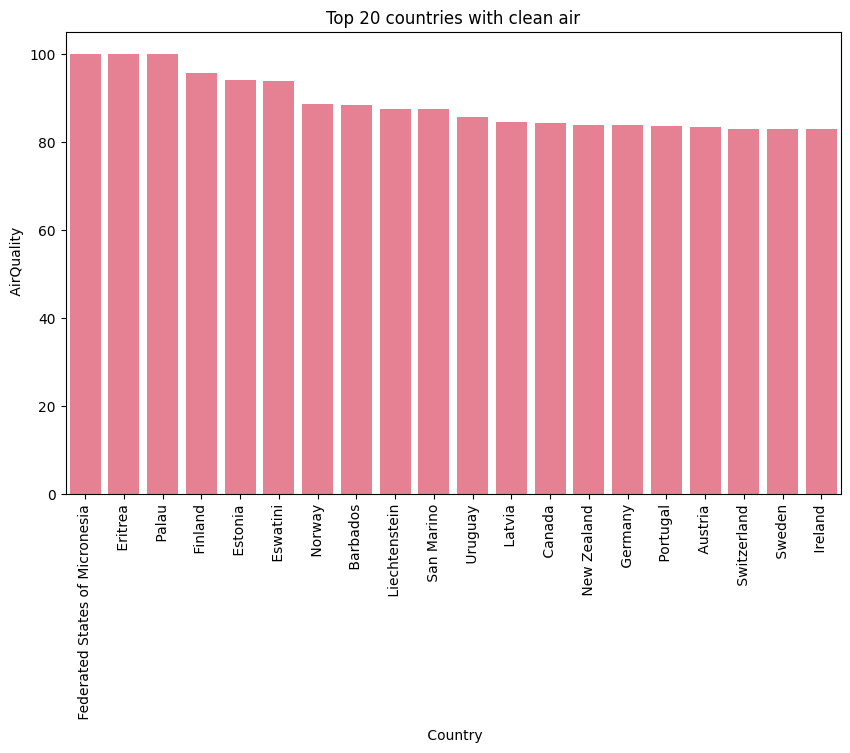

In [203]:
#membuat definition figure yang akan ditampilkan pada grafik
top_20_air = df.groupby(' Country')[' AirQuality'].mean().sort_values(ascending=False).head(20)

#membuat grafik bar untuk top 20
#membuat ukuran grafik
plt.figure(figsize=(10,6))

#membuat plot grafik menggunakan seaborn
sns.barplot(x=top_20_air.index, y=top_20_air)
plt.xticks(rotation=90)
plt.title("Top 20 countries with clean air")
plt.show()

berdasarkan penyajian grafik diatas menjelaskan bahwa FSOM (Micronesia) dan eritrea memiliki kualitas udara yang bagus di dunia.

In [204]:
#membuat data frame untuk top 20 negara dengan udara terbersih di dunia
top_20_air = df.groupby(' Country')[' AirQuality'].mean().sort_values(ascending=False).head(20)

# Membuat DataFrame untuk data tersebut
df_top_20_air = pd.DataFrame({'Country': top_20_air.index, 'AirQuality': top_20_air.values})

print(df_top_20_air)

                            Country  AirQuality
0    Federated States of Micronesia  100.000000
1                           Eritrea  100.000000
2                             Palau  100.000000
3                           Finland   95.771386
4                           Estonia   94.190796
5                          Eswatini   93.750000
6                            Norway   88.684587
7                          Barbados   88.333333
8                     Liechtenstein   87.500000
9                        San Marino   87.500000
10                          Uruguay   85.617690
11                           Latvia   84.517268
12                           Canada   84.293744
13                      New Zealand   83.787405
14                          Germany   83.768502
15                         Portugal   83.652677
16                          Austria   83.490955
17                      Switzerland   82.955762
18                           Sweden   82.938708
19                          Ireland   82

dalam kode ini dipertegas dengan nilai value dari negara yang memiliki udara terbesih di dunia

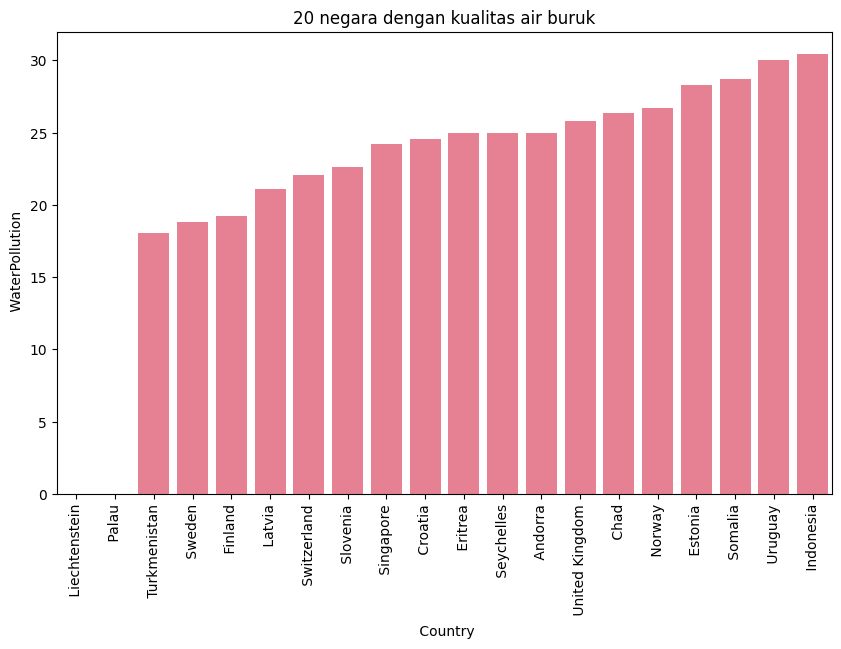

In [205]:
#membuat definisi untuk negara dengan kualitas air terburuk di dunia
bottom_20_water = df.groupby(' Country')[' WaterPollution'].mean().sort_values(ascending=True).head(20)

#membuat grafik bar untuk negara dengan kualitas air terburuk di dunia
#membuat ukuran grafik
plt.figure(figsize=(10,6))

#membuat plot grafik menggunakan seaborn
sns.barplot(x=bottom_20_water.index, y=bottom_20_water)
plt.xticks(rotation=90)
plt.title("20 negara dengan kualitas air buruk")
plt.show()

In [206]:
# Data frame untuk grafik "20 negara dengan kualitas air terburuk di dunia"
bottom_20_water=df.groupby(' Country')[' WaterPollution'].mean().sort_values(ascending=True).head(20)

df_bottom_20_water = pd.DataFrame({'Country': bottom_20_water.index, 'WaterPolution': bottom_20_water.values})

print(df_bottom_20_water)

            Country  WaterPolution
0     Liechtenstein       0.000000
1             Palau       0.000000
2      Turkmenistan      18.055556
3            Sweden      18.842412
4           Finland      19.231145
5            Latvia      21.131815
6       Switzerland      22.089957
7          Slovenia      22.613987
8         Singapore      24.204947
9           Croatia      24.544349
10          Eritrea      25.000000
11       Seychelles      25.000000
12          Andorra      25.000000
13   United Kingdom      25.791133
14             Chad      26.388889
15           Norway      26.712641
16          Estonia      28.313349
17          Somalia      28.750000
18          Uruguay      30.014430
19        Indonesia      30.449822


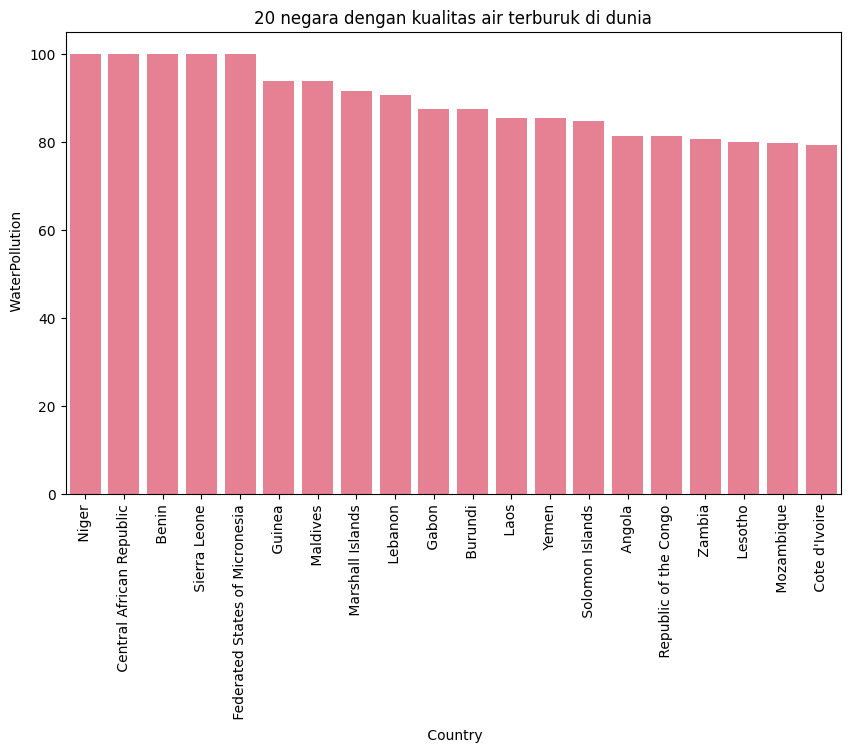

In [207]:
#membuat definisi untuk top 20 negara dengan kualitas air terbaik di dunia
top_20_water = df.groupby(' Country')[' WaterPollution'].mean().sort_values(ascending=False).head(20)

#membuat grafik bar untuk top 20
#membuat ukuran grafik
plt.figure(figsize=(10,6))

#membuat plot grafik menggunakan seaborn
sns.barplot(x=top_20_water.index, y=top_20_water)
plt.xticks(rotation=90)
plt.title("20 negara dengan kualitas air terburuk di dunia")
plt.show()

In [208]:
#membuat data frame untuk top 20 negara dengan kualitas air terburuk di dunia
top_20_water=df.groupby(' Country')[' WaterPollution'].mean().sort_values(ascending=False).head(20)
df_top_20_water = pd.DataFrame({'Country': top_20_water.index, 'WaterPolution': top_20_water.values})
print(df_top_20_water)

                            Country  WaterPolution
0                             Niger     100.000000
1          Central African Republic     100.000000
2                             Benin     100.000000
3                      Sierra Leone     100.000000
4    Federated States of Micronesia     100.000000
5                            Guinea      93.750000
6                          Maldives      93.750000
7                  Marshall Islands      91.666667
8                           Lebanon      90.763449
9                             Gabon      87.500000
10                          Burundi      87.500000
11                             Laos      85.555556
12                            Yemen      85.416667
13                  Solomon Islands      84.722222
14                           Angola      81.250000
15            Republic of the Congo      81.250000
16                           Zambia      80.769231
17                          Lesotho      80.000000
18                       Mozamb

In [209]:
# Menghitung Peringkat Jakarta
# Peringkat Jakarta berdasarkan AirQuality (kualitas udara)
jakarta_air_quality_rank = df[df['City'] == 'Jakarta'].sort_values(by=' AirQuality').index[0] + 1

# Peringkat Jakarta berdasarkan WaterPollution (kualitas air)
jakarta_water_pollution_rank = df[df['City'] == 'Jakarta'].sort_values(by=' WaterPollution', ascending=False).index[0] + 1

print("Peringkat Jakarta dalam hal AirQuality (kualitas udara):", jakarta_air_quality_rank)
print("Peringkat Jakarta dalam hal WaterPollution (kualitas air):", jakarta_water_pollution_rank)

# Menghitung jumlah kota dalam dataset
jumlah_kota = df['City'].nunique()

print("Jumlah Kota dalam dataset: ", jumlah_kota)



Peringkat Jakarta dalam hal AirQuality (kualitas udara): 317
Peringkat Jakarta dalam hal WaterPollution (kualitas air): 317
Jumlah Kota dalam dataset:  3796


In [210]:
# Daftar negara ASEAN dan ibukotanya
asean_capitals = {
    'Indonesia': 'Jakarta',
    'Malaysia': 'Kuala Lumpur',
    'Thailand': 'Bangkok',
    'Singapore': 'Singapore',
    'Philippines': 'Manila',
    'Vietnam': 'Hanoi',
    'Myanmar': 'Naypyidaw',
    'Cambodia': 'Phnom Penh',
    'Laos': 'Vientiane',
    'Brunei': 'Bandar Seri Begawan'
}

# DataFrame untuk Jakarta
jakarta_data = df[df['City'] == 'Jakarta']

# DataFrame untuk ibukota negara ASEAN lainnya
asean_capital_data = df[df['City'].isin(asean_capitals.values())]

# Menghitung rata-rata AirQuality untuk Jakarta dan ibukota negara ASEAN lainnya
average_air_quality_jakarta = jakarta_data[' AirQuality'].mean()
average_air_quality_asean_capitals = asean_capital_data.groupby('City')[' AirQuality'].mean()

# Tampilkan hasil perbandingan
print("Rata-rata AirQuality di Jakarta:", average_air_quality_jakarta)
print("Rata-rata AirQuality di ibukota negara ASEAN lainnya:")
print(average_air_quality_asean_capitals)


Rata-rata AirQuality di Jakarta: 22.265625
Rata-rata AirQuality di ibukota negara ASEAN lainnya:
City
Bandar Seri Begawan    82.954545
Bangkok                26.851852
Hanoi                  15.702479
Jakarta                22.265625
Kuala Lumpur           39.434524
Manila                 17.015707
Phnom Penh             26.063830
Singapore              65.878378
Vientiane              23.484848
Name:  AirQuality, dtype: float64


In [211]:
# Daftar negara ASEAN dan ibukotanya
asean_capitals = {
    'Indonesia': 'Jakarta',
    'Malaysia': 'Kuala Lumpur',
    'Thailand': 'Bangkok',
    'Singapore': 'Singapore',
    'Philippines': 'Manila',
    'Vietnam': 'Hanoi',
    'Myanmar': 'Naypyidaw',
    'Cambodia': 'Phnom Penh',
    'Laos': 'Vientiane',
    'Brunei': 'Bandar Seri Begawan'
}

# DataFrame untuk Jakarta
jakarta_data = df[df['City'] == 'Jakarta']

# DataFrame untuk ibukota negara ASEAN lainnya
asean_capital_data = df[df['City'].isin(asean_capitals.values())]

# Menghitung rata-rata AirQuality untuk Jakarta dan ibukota negara ASEAN lainnya
average_water_quality_jakarta = jakarta_data[' WaterPollution'].mean()
average_water_quality_asean_capitals = asean_capital_data.groupby('City')[' WaterPollution'].mean()

# Tampilkan hasil perbandingan
print("Rata-rata AirQuality di Jakarta:", average_water_quality_jakarta)
print("Rata-rata AirQuality di ibukota negara ASEAN lainnya:")
print(average_water_quality_asean_capitals)

Rata-rata AirQuality di Jakarta: 77.1
Rata-rata AirQuality di ibukota negara ASEAN lainnya:
City
Bandar Seri Begawan    48.863636
Bangkok                70.833333
Hanoi                  77.350427
Jakarta                77.100000
Kuala Lumpur           65.683230
Manila                 83.743169
Phnom Penh             70.833333
Singapore              24.204947
Vientiane              73.333333
Name:  WaterPollution, dtype: float64
